In [1]:
from pyspark.sql.functions import *

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210411235427-0005
KERNEL_ID = 2b209fc7-f100-4785-b41f-4254da8e878b


In [2]:
import ibmos2spark, os
# @hidden_cell

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_5fc9833f13ed4170a3d793ba6b80e11a = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_5fc9833f13ed4170a3d793ba6b80e11a = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

credentials = {
    'endpoint': endpoint_5fc9833f13ed4170a3d793ba6b80e11a,
    'service_id': 'iam-ServiceId-a9f1577d-5270-4858-8b14-345ee4bfb744',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': 'SZLYLSD_wZpkWnqiF6AzCgVrL9lm-JCubzDrqmhf30Za'
}

configuration_name = 'os_5fc9833f13ed4170a3d793ba6b80e11a_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Carga y tipos de datos

In [3]:
#Joins guardados
#trips_weather
#trips_to_station
#trips_from_station

#Dataframes limpio y modificados
#stations_fixed
#weather_fixed
#trips_fixed

print("*** ¿Cuáles son numéricas? ¿Cuáles son categóricas? ¿Existe otro tipo de información? ***\n")
#Joins guardados
print("*** Joins Guardados ***\n")
df_trips_weather = spark.read.option("inferSchema", "true").parquet(cos.url('trips_weather', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))
print("Schema Join Trips-Weather")
df_trips_weather.printSchema()
print("Describe Join Trips-Weather")
df_trips_weather.describe().show()
print("\n")

df_trips_to_station = spark.read.option("inferSchema", "true").parquet(cos.url('trips_to_station', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))
print("Schema Join Trips-ToStation")
df_trips_to_station.printSchema()
print("Describe Join Trips-ToStation")
df_trips_to_station.describe().show()
print("\n")

df_trips_from_station = spark.read.option("inferSchema", "true").parquet(cos.url('trips_from_station', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))
print("Schema Join Trips-FromStation\n")
df_trips_from_station.printSchema()
print("Describe Join Trips-FromStation")
df_trips_from_station.describe().show()
print("\n")
print("\n")

#Dataframes limpio y modificados
print("*** Dataframes limpio y modificados ***\n")
df_trips_fixed = spark.read.option("inferSchema", "true").parquet(cos.url('trips_fixed', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))
print("Schema Trips")
df_trips_fixed.printSchema()
print("Describe Trips")
df_trips_fixed.describe().show()
print("\n")

df_weather_fixed = spark.read.option("inferSchema", "true").parquet(cos.url('weather_fixed', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))
print("Schema Weather")
df_weather_fixed.printSchema()
print("Describe Weather")
df_weather_fixed.describe().show()
print("\n")

df_stations_fixed = spark.read.option("inferSchema", "true").parquet(cos.url('stations_fixed', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))
print("Schema Stations")
df_stations_fixed.printSchema()
print("Describe Stations")
df_stations_fixed.describe().show()
print("\n")

#Cabe destacar que entre los datos string tenemos variables categóricas(como events de weather, seasons de weather, entre otros) y contamos con identificadores alfanumericos (como stationid, tripid, entre otros)

*** ¿Cuáles son numéricas? ¿Cuáles son categóricas? ¿Existe otro tipo de información? ***

*** Joins Guardados ***

Schema Join Trips-Weather
root
 |-- Date: date (nullable = true)
 |-- trip_id: integer (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: double (nullable = true)
 |-- Min_Temperature

# Analisis variables numericas

In [4]:
#Para las variables numéricas, analice su distribución, extraiga conclusiones.
#Utilice la mayor cantidad posible de herramientas dadas en clase para presentar sus conclusiones.

#Variables 
# Discretizamos la variable trip_duration_minutes utilizando un discretizador por cuantiles y 10 valores discretos

from pyspark.ml.feature import QuantileDiscretizer

#trip_duration_minutes
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="trip_duration_minutes", outputCol="quantil_trip_duration_minutes")
result = discretizer.fit(df_trips_weather).transform(df_trips_weather)
result.show()

+----------+-------+-------------------+-------------------+--------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+----+------------+------------+---------------------+---------------------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+--------------------+---------------------+--------------------+------------------+-------------------+------------------+----------------+--------+---------+-----------------------------+
|      Date|trip_id|          starttime|           stoptime|  bikeid|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear| age|quarter_date|   age_range|trip_duration_seconds|trip_duration_minutes|Max_Temperature_F|Mean_Temperature_F|Min_TemperatureF|Max_Dew_Point_F|MeanDew_Point

In [5]:
# Agrupamos por la variable quantil y analizamos los valores mínimos y máximos de tripduration
# También imprimimos la cantidad de filas en cada cuantil.

#Conclusion
#En base a la variacion (diferencia entre maximo y minimo) notamos que la mayoria de los quantiles muestra un valor muy similar.
#Aunque en los dos ultimos quantiles notamos una diferencia, aun asi el que sin duda alguna representa una complicacion es el ultimo quantil.
#Teniendo una variacion de 444, lo cual es muy grande, demostrando una necesidad de generar el discritizer con una mayor cantidad de buckets.
#Esto ayudaria a conocer si tenemos muchos mas grupos o en trip duration tenemos valores muy dispares.

result.groupBy("quantil_trip_duration_minutes").agg(min("trip_duration_minutes").alias("Min_tripdur"),max("trip_duration_minutes").alias("Max_tripdur"),(max("trip_duration_minutes")-min("trip_duration_minutes")).alias("Variacion"),count("*").alias("Cantidad")).orderBy(asc("Min_tripdur")).show()

+-----------------------------+-----------+-----------+---------+--------+
|quantil_trip_duration_minutes|Min_tripdur|Max_tripdur|Variacion|Cantidad|
+-----------------------------+-----------+-----------+---------+--------+
|                          0.0|        1.0|        3.0|      2.0|   13629|
|                          1.0|        4.0|        5.0|      1.0|   28241|
|                          2.0|        6.0|        6.0|      0.0|   16599|
|                          3.0|        7.0|        8.0|      1.0|   31991|
|                          4.0|        9.0|       10.0|      1.0|   26887|
|                          5.0|       11.0|       12.0|      1.0|   20106|
|                          6.0|       13.0|       16.0|      3.0|   27225|
|                          7.0|       17.0|       21.0|      4.0|   21386|
|                          8.0|       22.0|       35.0|     13.0|   25868|
|                          9.0|       36.0|      480.0|    444.0|   24126|
+------------------------

In [6]:
#Analisis de temperatura media, max y min durante los años registrados en df_weather
#Insight de microclima de Seattle

#Se denota que en el 2015 y el 2016 hubo un sensible aumento comparado al 2014, el cual por ahora parece ser relativamente estable.
#Tambien ocurre con la minima la cual parece aumentar.
#Tambien ocurre con la maxima la cual parece aumentar.
#Esto lleva a deducir que el microclima de Seattle tiende a aumentar su temperatura.

df_weather_fixed.groupBy(year("Date").alias("Year")).agg(round(avg("Mean_Temperature_F"),2).alias("AVG Mean Temp"),round(avg("Max_Temperature_F"),2).alias("AVG Max Temp"),round(avg("Min_TemperatureF"),2).alias("AVG Min Temp")).orderBy("year").show()

+----+-------------+------------+------------+
|Year|AVG Mean Temp|AVG Max Temp|AVG Min Temp|
+----+-------------+------------+------------+
|2014|        49.85|       55.48|       44.29|
|2015|        57.54|       65.02|       50.44|
|2016|        57.35|       65.35|       49.67|
+----+-------------+------------+------------+



# Analisis variables categoricas

In [27]:
from pyspark.ml.feature import StringIndexer

# StringIndexer nos permite transformar una variable categórica de texto en índices
# Se utiliza para indizar la variable Events

#result es el df transformado

# Creamos el modelo
indexer1 = StringIndexer(inputCol="Events", outputCol="EventsIndex")
# Entrenamos el modelo y lo utilizamos sobre train directamente
indexed1 = indexer1.fit(result).transform(result)

indexed1.select("Events", "EventsIndex").orderBy("EventsIndex").distinct().show()

#Se debe generar lo mismo para gender

+-----------------+-----------+
|           Events|EventsIndex|
+-----------------+-----------+
|             Snow|        5.0|
|        Rain-Snow|        6.0|
|         Fog-Rain|        3.0|
|              Fog|        2.0|
|Rain-Thunderstorm|        4.0|
|           Normal|        0.0|
|             Rain|        1.0|
+-----------------+-----------+



In [40]:
indexed1.select("gender").distinct().show()

+------+
|gender|
+------+
|  null|
|Female|
| Other|
|  Male|
+------+



In [41]:
#df_weather_NoNAevent = df_weather_fechas.na.fill("Normal", ["Events"])
indexed1 = indexed1.na.fill("NoInfo", ["gender"])

In [42]:
indexed1.select("gender").distinct().show()

+------+
|gender|
+------+
|Female|
|NoInfo|
| Other|
|  Male|
+------+



In [43]:
## StringIndexer nos permite transformar una variable categórica de texto en índices
# Se utiliza para indizar la variable gender

indexer2 = StringIndexer(inputCol="gender", outputCol="genderIndex")
indexed2 = indexer2.fit(indexed1).transform(indexed1)

indexed2.printSchema()
indexed2.show(5)
indexed2.select("genderIndex").distinct().show()

root
 |-- Date: date (nullable = true)
 |-- trip_id: integer (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = false)
 |-- birthyear: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: double (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoin

In [44]:
indexed2.select("gender", "genderIndex").orderBy("genderIndex").distinct().show()

+------+-----------+
|gender|genderIndex|
+------+-----------+
|NoInfo|        1.0|
|  Male|        0.0|
| Other|        3.0|
|Female|        2.0|
+------+-----------+



# Trabajo para conseguir una revision mensual de clima

In [65]:
#Se revisa si fue un dia normal o hubo alguna inclemencia climatologica, esto posteriormente se utilizara para una medida para analizar mensualmente el clima

df_trips_weather_v2= indexed2.withColumn("IsGoodWeather", when((col("EventsIndex") == 0), 1).\
                                  otherwise(0))

In [66]:
df_trips_weather_v2.printSchema()
df_trips_weather_v2.show(5)

root
 |-- Date: date (nullable = true)
 |-- trip_id: integer (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = false)
 |-- birthyear: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: double (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoin

In [67]:
df_trips_weather_v2.select("Events","IsGoodWeather").orderBy("IsGoodWeather").distinct().show()

+-----------------+-------------+
|           Events|IsGoodWeather|
+-----------------+-------------+
|              Fog|            0|
|             Rain|            0|
|           Normal|            1|
|Rain-Thunderstorm|            0|
|         Fog-Rain|            0|
|             Snow|            0|
|        Rain-Snow|            0|
+-----------------+-------------+



# Ejercicio 2 - Modelado

In [87]:
import pyspark.sql.functions as F
cnt_cond = lambda cond: F.sum(F.when(cond, 1).otherwise(0))

df_trips_weather_v2.groupBy(year("Date").alias("Year"),month("Date").alias("Month")).agg(cnt_cond(F.col('IsGoodWeather') > 0).alias('Goodweather_QTY'),cnt_cond(F.col('IsGoodWeather') >= 0).alias('Total_QTY'),round((cnt_cond(F.col('IsGoodWeather') > 0)/cnt_cond(F.col('IsGoodWeather') >= 0)),2).alias("GoodWeatherRate")).orderBy(year("Date"),month("Date")).show()

+----+-----+---------------+---------+---------------+
|Year|Month|Goodweather_QTY|Total_QTY|GoodWeatherRate|
+----+-----+---------------+---------+---------------+
|2014|   10|            666|     6585|            0.1|
|2014|   11|           3972|     7816|           0.51|
|2014|   12|           2603|     5831|           0.45|
|2015|    1|           2968|     7368|            0.4|
|2015|    2|           3069|     7330|           0.42|
|2015|    3|           4701|     9980|           0.47|
|2015|    4|           5324|    12898|           0.41|
|2015|    5|          13524|    15548|           0.87|
|2015|    6|          14232|    15999|           0.89|
|2015|    7|          16820|    18808|           0.89|
|2015|    8|          13995|    17046|           0.82|
|2015|    9|           9441|    13134|           0.72|
|2015|   10|           5334|    10605|            0.5|
|2015|   11|           1390|     6541|           0.21|
|2015|   12|            606|     5049|           0.12|
|2016|    

In [88]:
df_trips_weather_v2.write.mode("overwrite").parquet(cos.url('trips_weather_v2', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))

In [98]:
df_trips_weather_v2.select("Date").show(5)

+----------+
|      Date|
+----------+
|2014-10-29|
|2015-05-11|
|2015-08-05|
|2016-06-17|
|2014-10-26|
+----------+
only showing top 5 rows



# Manejo de date alternativo como si fuera un string YYYYMMDD para mejorar eficiencia

In [130]:
from pyspark.sql.types import StringType
df_try_trips_weather = df_trips_weather_v2

df_trips_weather_v2 = df_trips_weather_v2.drop("StrDateEfficient")

df_trips_weather_v2 = df_trips_weather_v2.withColumn("fechaSTR",df_trips_weather_v2["Date"].cast(StringType()))
df_trips_weather_v2 = df_trips_weather_v2.withColumn("fechaSTR", regexp_replace("fechaSTR", '-', ''))

df_trips_weather_v2.printSchema()
df_trips_weather_v2.select("Date","fechaSTR").show(5)

root
 |-- Date: date (nullable = true)
 |-- trip_id: integer (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = false)
 |-- birthyear: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: double (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoin

In [131]:
df_trips_weather_v2.write.mode("overwrite").parquet(cos.url('trips_weather_v2', 'tallerdadatasciencecamiloferreira-donotdelete-pr-fz0ndvhao4eorr'))

# Ejercicio 2 - Modelado

In [183]:
df_try_trips_weather = df_trips_weather_v2
df_try_trips_weather.printSchema()

root
 |-- Date: date (nullable = true)
 |-- trip_id: integer (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = false)
 |-- birthyear: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: double (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoin

In [179]:
#Importacion pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import distplot
from seaborn import boxplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

%matplotlib nbagg
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [194]:
#Generacion de un sub dataframe eliminando atributos que entendemos no usaremos para el punto 1 de la parte 2
df_try1_pyspark = df_try_trips_weather

df_try1_pyspark = df_try1_pyspark.drop("fechaSTR","IsGoodWeather","quantil_trip_duration_minutes","Events","Precipitation_In","Max_Gust_Speed_MPH","Max_Wind_Speed_MPH","Min_Visibility_Miles","Max_Visibility_Miles","Min_Sea_Level_Pressure_In","Mean_Sea_Level_Pressure_In","Max_Sea_Level_Pressure_In","Min_Humidity","Mean_Humidity","Max_Humidity","Min_Dewpoint_F","MeanDew_Point_F","Max_Dew_Point_F", "trip_id","starttime","stoptime","bikeid","from_station_name","to_station_name","usertype","gender","birthyear","Max_Temperature_F","Mean_Temperature_F","Min_TemperatureF")

df_try1_pyspark.printSchema()

root
 |-- Date: date (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Mean_Visibility_Miles: integer (nullable = true)
 |-- Mean_Wind_Speed_MPH: integer (nullable = true)
 |-- temporada: string (nullable = true)
 |-- EventsIndex: double (nullable = false)
 |-- genderIndex: double (nullable = false)



root
 |-- trip_duration_minutes: double (nullable = true)
 |-- Mean_Visibility_Miles: integer (nullable = true)
 |-- Mean_Wind_Speed_MPH: integer (nullable = true)



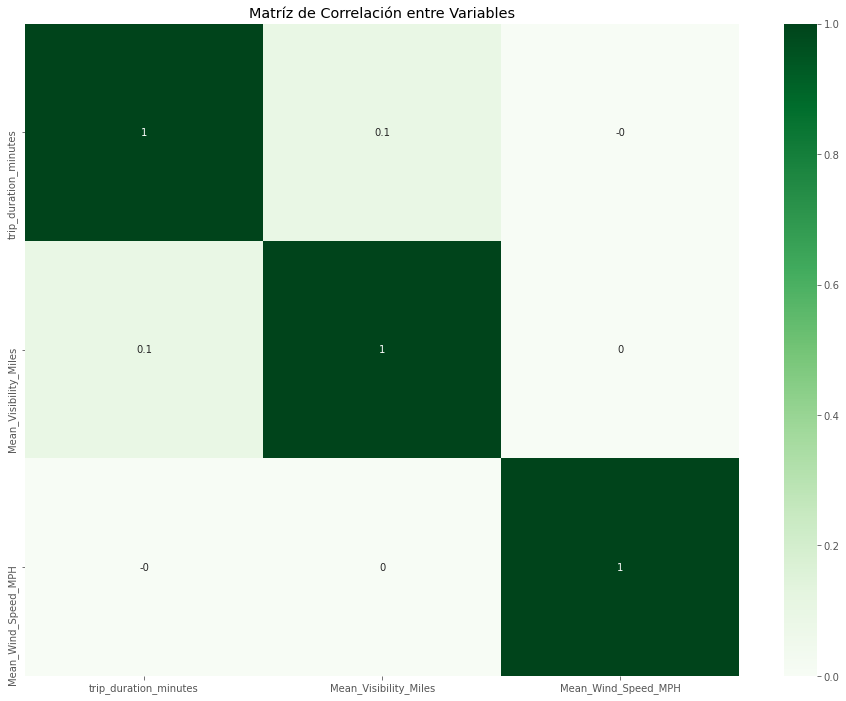

In [200]:
#Se crea un nuevo sub data frame dejando duracion en minutos de viajes, visibilidad media, velocidad media de viento
#Esto para entender si la duracion de los viajes pueden verse afectadas por estos factores del clima
df_try2_pyspark = df_try1_pyspark
df_try2_pyspark = df_try2_pyspark.drop("Date","from_station_id","to_station_id","quarter_date","age_range","trip_duration_seconds","temporada","EventsIndex","genderIndex","age")
df_try2_pyspark.printSchema()
df_pandas2 = df_try2_pyspark.toPandas()

plt.figure(figsize = (16,12))
plt.title('Matríz de Correlación entre Variables')
correlation_matrix = df_pandas2.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap="Greens")

In [202]:
df_try3_pyspark = df_try1_pyspark
df_pandas3 = df_try3_pyspark.toPandas()
df_try3_pyspark.printSchema()

root
 |-- Date: date (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- trip_duration_seconds: long (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- Mean_Visibility_Miles: integer (nullable = true)
 |-- Mean_Wind_Speed_MPH: integer (nullable = true)
 |-- temporada: string (nullable = true)
 |-- EventsIndex: double (nullable = false)
 |-- genderIndex: double (nullable = false)



(0.0, 7000.0)

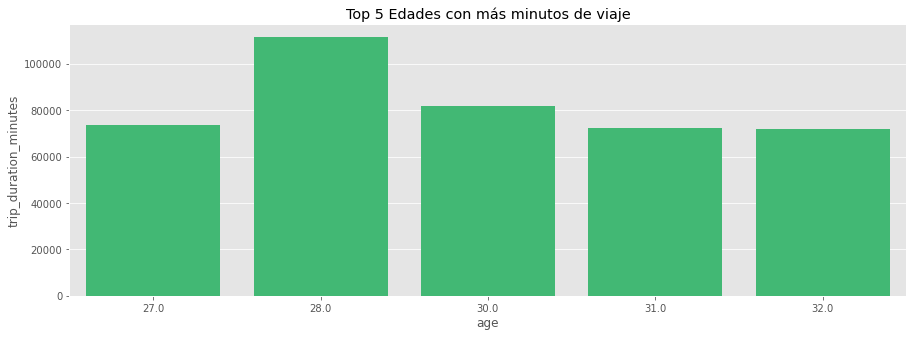

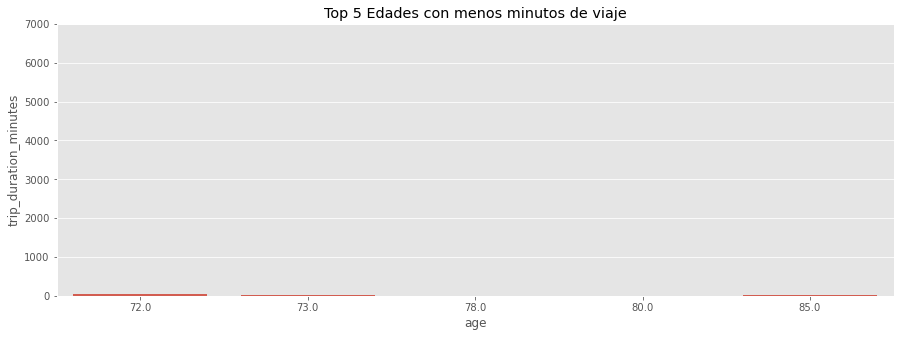

In [217]:
#Suma de trip minutes por edad, max 5
data_maxtop5_MinAge = df_pandas3.groupby('age')['trip_duration_minutes'].sum()
data_maxtop5_MinAge = data_maxtop5_MinAge.reset_index().sort_values(by='trip_duration_minutes', ascending=False).head(5)

#Suma de trip minutes por edad, min 5
data_mintop5_MinAge = df_pandas3.groupby('age')['trip_duration_minutes'].sum()
data_mintop5_MinAge = data_mintop5_MinAge.reset_index().sort_values(by='trip_duration_minutes', ascending=True).head(5)


plt.figure(figsize=(15, 5))
plt.title('Top 5 Edades con más minutos de viaje')
sns.barplot(x="age", y="trip_duration_minutes", data=data_maxtop5_MinAge, color="#2ecc71")

plt.figure(figsize=(15, 5))
plt.title('Top 5 Edades con menos minutos de viaje')
g = sns.barplot(x="age", y="trip_duration_minutes", data=data_mintop5_MinAge, color="#e74c3c")
g.set_ylim(0, 7000)

#De esta manera conocemos que usuarios son lo que hacen viajes más largos, ende viajes más caros en general
#Por otra parte podemos conocer usuarios a los que podríamos buscar manera de estimular, como aplicar descuentos